In [3]:
import numpy as np

In [2]:
2+3


5

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [19]:
from tensorflow import keras

In [22]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [29]:
len(X_train)
len(X_test)

10000

In [30]:
X_train[0].shape

(28, 28)

In [57]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

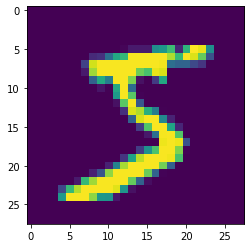

In [33]:
plt.imshow(X_train[0])

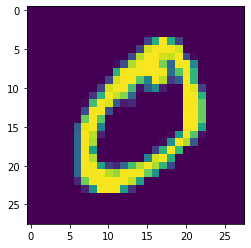

In [34]:
plt.imshow(X_train[1])

In [38]:
y_train[1]


0

In [39]:
X_train.shape

(60000, 28, 28)

In [55]:
X_train=X_train/255
X_test=X_test/255
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [47]:
X_test_flatten.shape

(10000, 784)

In [49]:
X_train_flatten[0].shape

(784,)

In [70]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2842 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1326 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0913 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9836


In [72]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9762


[0.07576577365398407, 0.9761999845504761]

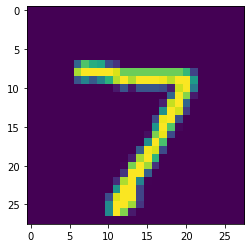

In [59]:
plt.imshow(X_test[0])

In [61]:
y_predicted = model.predict(X_test_flatten)


313/313 [==============================] - 1s 2ms/step


In [62]:
y_predicted.shape

(10000, 10)

In [64]:
np.argmax(y_predicted[0])

7

In [74]:
y_predicted_lebels = [np.argmax(i) for i in y_predicted]
y_predicted_lebels[:5]

[7, 2, 1, 0, 4]

In [75]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lebels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,    9,  909,   23,    7,    5,   13,   10,   47,    3],
       [   4,    0,   13,  931,    1,   21,    3,    9,   21,    7],
       [   2,    1,    2,    2,  914,    0,   12,    4,    9,   36],
       [   9,    2,    1,   36,    7,  780,   17,    4,   30,    6],
       [  11,    3,    5,    2,    7,   12,  915,    1,    2,    0],
       [   1,    6,   20,   10,    9,    0,    0,  946,    4,   32],
       [   5,   10,    7,   29,    9,   27,    8,   10,  863,    6],
       [  10,    7,    1,   12,   30,    6,    0,   21,    9,  913]])>

Text(69.0, 0.5, 'Truth')

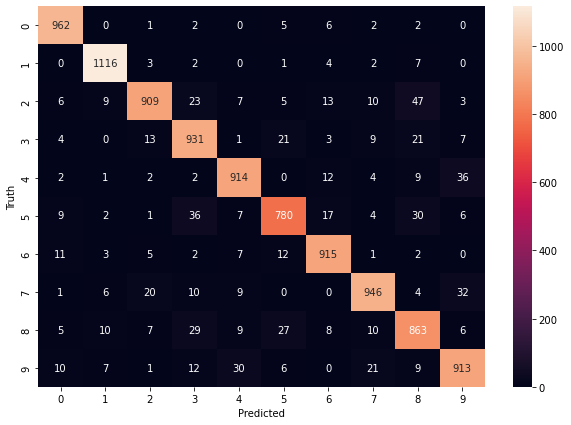

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9845


In [78]:
y_predicted_lebels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lebels)

Text(69.0, 0.5, 'Truth')

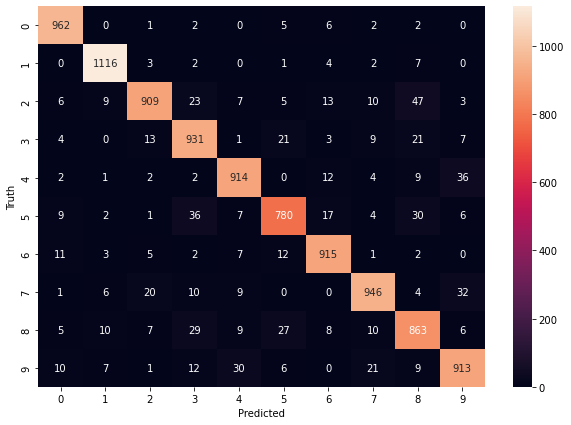

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')